<a href="https://colab.research.google.com/github/luthra2059/Image-Data-Augmentation-with-Keras/blob/master/Image_Data_Agumentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%matplotlib inline

In [25]:
import os
import numpy as np
import tensorflow as tf
from PIL import Image
from matplotlib import pyplot as plt

print('Using Tensorflow', tf.__version__)

Using Tensorflow 2.2.0


In [0]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range = 40
)

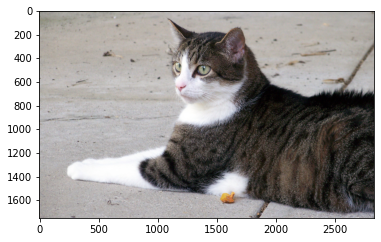

In [27]:
image_path = 'drive/My Drive/images/cat/cat.jpg'
plt.imshow(plt.imread(image_path))

Found 1 images belonging to 1 classes.


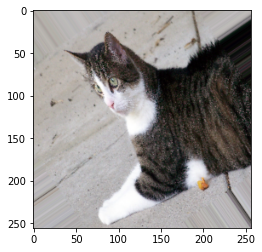

In [29]:
x, y = next(generator.flow_from_directory('drive/My Drive/images/', batch_size=1))
plt.imshow(x[0].astype('uint8'))

In [0]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(
    width_shift_range = [-100, -50, 0, 50, 100],
    height_shift_range = [-50,0 ,50]
)

Found 1 images belonging to 1 classes.


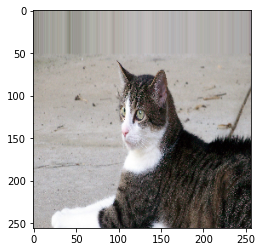

In [32]:
x, y = next(generator.flow_from_directory('drive/My Drive/images/', batch_size=1))
plt.imshow(x[0].astype('uint8'))

Found 1 images belonging to 1 classes.


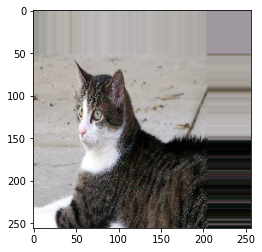

In [37]:
genetator = tf.keras.preprocessing.image.ImageDataGenerator(
    brightness_range = (0.5, 2.)
)
x, y = next(generator.flow_from_directory('drive/My Drive/images/', batch_size=1))
plt.imshow(x[0].astype('uint8'))

Found 1 images belonging to 1 classes.


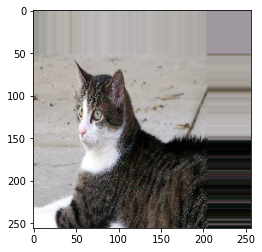

In [44]:
genetator = tf.keras.preprocessing.image.ImageDataGenerator(
    shear_range = 40
)
x, y = next(generator.flow_from_directory('drive/My Drive/images/', batch_size=1))
plt.imshow(x[0].astype('uint8'))

Found 1 images belonging to 1 classes.


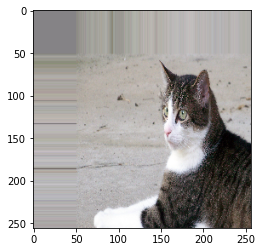

In [47]:
genetator = tf.keras.preprocessing.image.ImageDataGenerator(
    zoom_range = 0.5
)
x, y = next(generator.flow_from_directory('drive/My Drive/images/', batch_size=1))
plt.imshow(x[0].astype('uint8'))

Found 1 images belonging to 1 classes.


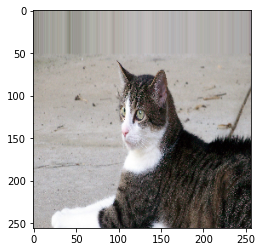

In [50]:
genetator = tf.keras.preprocessing.image.ImageDataGenerator(
    channel_shift_range = 100
)
x, y = next(generator.flow_from_directory('drive/My Drive/images/', batch_size=1))
plt.imshow(x[0].astype('uint8'))